In [9]:
import sys
print(sys.version)


3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 16:37:03) [MSC v.1929 64 bit (AMD64)]


In [10]:
import tensorflow as tf
import os
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Activation, MaxPooling2D, BatchNormalization,
    Input, Dropout, Dense, Flatten,
    GlobalAveragePooling2D, Reshape)
from tensorflow.keras.preprocessing import image


# Data Preparation

In [ ]:
import os
import shutil
import random

# Paths
dataset_dir = "defect-classification-in-stem-images-main\\Image Data\\DataSet_CdTe"  # original dataset
train_dir = "train"
val_dir = "validation"
test_dir = "test"

# Split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Create train, validation, and test directories 
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over subfolders
for subfolder in os.listdir(dataset_dir):
    subfolder_path = os.path.join(dataset_dir, subfolder)
    if os.path.isdir(subfolder_path):
        
        # Create corresponding subfolders in train, validation, and test
        train_subfolder = os.path.join(train_dir, subfolder)
        val_subfolder = os.path.join(val_dir, subfolder)
        test_subfolder = os.path.join(test_dir, subfolder)
        os.makedirs(train_subfolder, exist_ok=True)
        os.makedirs(val_subfolder, exist_ok=True)
        os.makedirs(test_subfolder, exist_ok=True)

        # List all files in the subfolder
        files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
        random.shuffle(files)  # shuffle the files

        # Compute split indices
        total_files = len(files)
        train_end = int(total_files * train_ratio)
        val_end = train_end + int(total_files * val_ratio)

        # Split files
        train_files = files[:train_end]
        val_files = files[train_end:val_end]
        test_files = files[val_end:]

        # Copy files to respective folders
        for f in train_files:
            shutil.copy(os.path.join(subfolder_path, f), os.path.join(train_subfolder, f))
        for f in val_files:
            shutil.copy(os.path.join(subfolder_path, f), os.path.join(val_subfolder, f))
        for f in test_files:
            shutil.copy(os.path.join(subfolder_path, f), os.path.join(test_subfolder, f))

print("Dataset split into train, validation, and test completed!")


# Model for STO

In [11]:
test_dir = r"C:\Users\sous5\Desktop\Claudia 2025\Hackaton\dataset surabhi\STO\test"
val_dir = r"C:\Users\sous5\Desktop\Claudia 2025\Hackaton\dataset surabhi\STO\validation"
train_dir = r"C:\Users\sous5\Desktop\Claudia 2025\Hackaton\dataset surabhi\STO\train"

Text(0.5, 1.0, 'Distribution across classes')

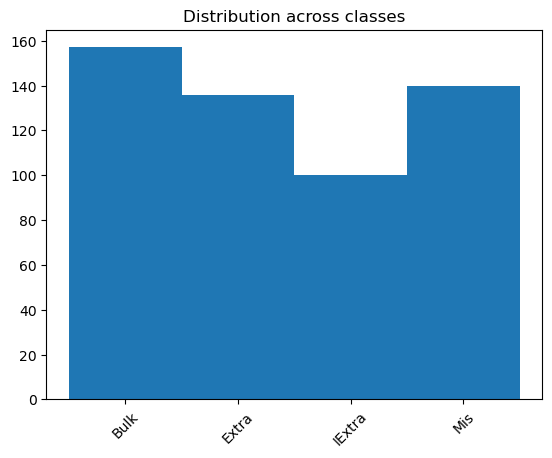

In [12]:
#preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

y_train = []
images = []
flat_data = []

categories = ['Bulk', 'Extra', 'IExtra', 'Mis']
for category in categories:
    class_num = categories.index(category) #label encoding the values
    path = os.path.join(train_dir, category) # create path to use all the images
    for img in os.listdir(path):
        y_train.append(class_num)

y_train = np.array(y_train)
unique, count = np.unique(y_train, return_counts = True)
plt.bar(categories, count, width=1)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title('Distribution across classes')

Text(0.5, 1.0, 'Distribution across classes')

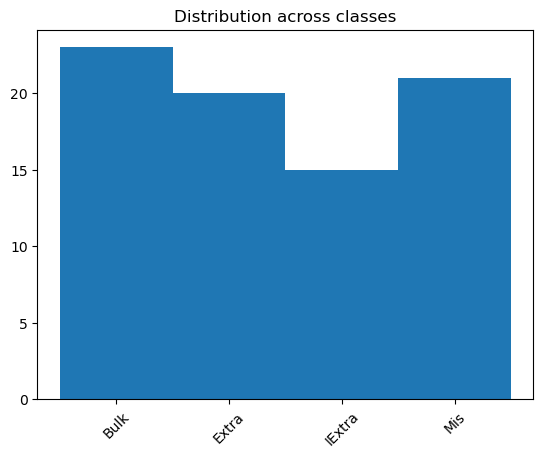

In [13]:
y_test = []
categories = ['Bulk', 'Extra', 'IExtra', 'Mis']
for category in categories:
    class_num = categories.index(category) #label encoding the values
    path = os.path.join(test_dir, category) # create path to use all the images
    for img in os.listdir(path):
        y_test.append(class_num)

y_test = np.array(y_test)
unique, count = np.unique(y_test, return_counts = True)
plt.bar(categories, count, width=1)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title('Distribution across classes')

Text(0.5, 1.0, 'Distribution across classes')

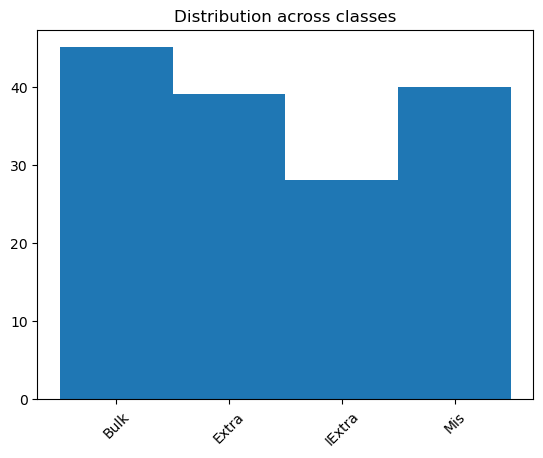

In [14]:
y_val = []
categories = ['Bulk', 'Extra', 'IExtra', 'Mis']
for category in categories:
    class_num = categories.index(category) #label encoding the values
    path = os.path.join(val_dir, category) # create path to use all the images
    for img in os.listdir(path):
        y_val.append(class_num)

y_val = np.array(y_val)
unique, count = np.unique(y_val, return_counts = True)
plt.bar(categories, count, width=1)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title('Distribution across classes')

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip=True,
                                    vertical_flip=False)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_dir,
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
print(training_set.class_indices)

Found 533 images belonging to 4 classes.
Found 79 images belonging to 4 classes.
Found 152 images belonging to 4 classes.
{'Bulk': 0, 'Extra': 1, 'IExtra': 2, 'Mis': 3}


In [32]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

In [33]:
mobilenetv2 = keras.applications.mobilenet_v2.MobileNetV2(
    include_top = False,
    input_shape = (224,224,3)
    )
mobilenetv2.trainable = True

for layer in mobilenetv2.layers[:-40]:
    layer.trainable = False


input_layer = keras.Input(shape = (224,224,3))
x = mobilenetv2(input_layer,training = False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(512,activation='relu')(x)
output_layer = keras.layers.Dense(4,activation="softmax")(x)
model = Model(inputs = input_layer, outputs = output_layer)

In [34]:
model.compile(loss="CategoricalCrossentropy", metrics=["accuracy", "Recall", "Precision"], optimizer=keras.optimizers.Adam(learning_rate=0.001
                                                                                                                           , beta_1=0.9, beta_2=0.999,amsgrad=False))

In [35]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=7)

hist = model.fit(
    training_set,
    validation_data=val_set,
    epochs=25,
    callbacks=[early_stop]
)

Epoch 1/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - Precision: 0.4694 - Recall: 0.1726 - accuracy: 0.3884 - loss: 1.5112 - val_Precision: 0.3487 - val_Recall: 0.3487 - val_accuracy: 0.3487 - val_loss: 3.6466
Epoch 2/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - Precision: 0.8220 - Recall: 0.5460 - accuracy: 0.6904 - loss: 0.7296 - val_Precision: 0.4179 - val_Recall: 0.3684 - val_accuracy: 0.3947 - val_loss: 3.0646
Epoch 3/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - Precision: 0.8465 - Recall: 0.7448 - accuracy: 0.7936 - loss: 0.5796 - val_Precision: 0.4755 - val_Recall: 0.4474 - val_accuracy: 0.4539 - val_loss: 2.8627
Epoch 4/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - Precision: 0.8742 - Recall: 0.7692 - accuracy: 0.8368 - loss: 0.4665 - val_Precision: 0.3716 - val_Recall: 0.3618 - val_accuracy: 0.3618 - val_loss: 3.1652
Epoch 5/25
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - Precision: 0.8980 - Recall: 0.8255 - accuracy: 0.8780 - loss: 0.4022 - val_Precision: 0.2500 - val_Recall: 0.2500 - 

In [25]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=7)

hist = model.fit(
    training_set,
    validation_data=val_set,
    epochs=25,
    callbacks=[early_stop]
)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - Precision: 0.4397 - Recall: 0.2533 - accuracy: 0.4015 - loss: 1.4820 - val_Precision: 0.2632 - val_Recall: 0.2632 - val_accuracy: 0.2632 - val_loss: 3.5757
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - Precision: 0.7745 - Recall: 0.5478 - accuracy: 0.6735 - loss: 0.7866 - val_Precision: 0.2632 - val_Recall: 0.2632 - val_accuracy: 0.2632 - val_loss: 12.4541
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - Precision: 0.8742 - Recall: 0.7430 - accuracy: 0.8236 - loss: 0.4828 - val_Precision: 0.2632 - val_Recall: 0.2632 - val_accuracy: 0.2632 - val_loss: 22.1231
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - Precision: 0.8860 - Recall: 0.8311 - accuracy: 0.8574 - loss: 0.4223 - val_Precision: 0.2697 - val_Recall: 0.2697 - val_accuracy: 0.2697 - val_loss: 24.8378
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - Precision: 0.9023 - Recall: 0.8668 - accuracy: 0.8837 - loss: 0.3035 - val_Precision: 0.3947 - val_Recall: 0.3947 - val_acc

In [21]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=7)

hist = model.fit(
    training_set,
    validation_data=val_set,
    epochs=25,
    callbacks=[early_stop]
)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - Precision: 0.3187 - Recall: 0.1501 - accuracy: 0.3208 - loss: 1.7045 - val_Precision: 0.3212 - val_Recall: 0.2895 - val_accuracy: 0.3092 - val_loss: 3.8163
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - Precision: 0.8202 - Recall: 0.4109 - accuracy: 0.6248 - loss: 0.8589 - val_Precision: 0.3931 - val_Recall: 0.3750 - val_accuracy: 0.3816 - val_loss: 2.8241
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - Precision: 0.8388 - Recall: 0.7223 - accuracy: 0.7880 - loss: 0.5667 - val_Precision: 0.3087 - val_Recall: 0.3026 - val_accuracy: 0.3026 - val_loss: 5.0267
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - Precision: 0.8826 - Recall: 0.8180 - accuracy: 0.8574 - loss: 0.4035 - val_Precision: 0.3113 - val_Recall: 0.3092 - val_accuracy: 0.3092 - val_loss: 4.0836
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - Precision: 0.9110 - Recall: 0.8837 - accuracy: 0.8931 - loss: 0.3016 - val_Precision: 0.2980 - val_Recall: 0.2961 - val_accura

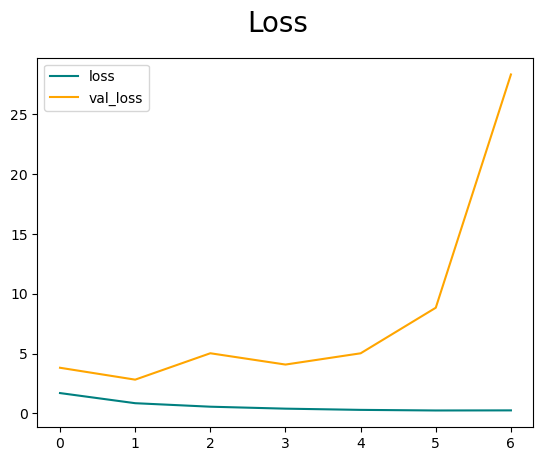

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label = 'loss')
plt.plot(hist.history['val_loss'], color= 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

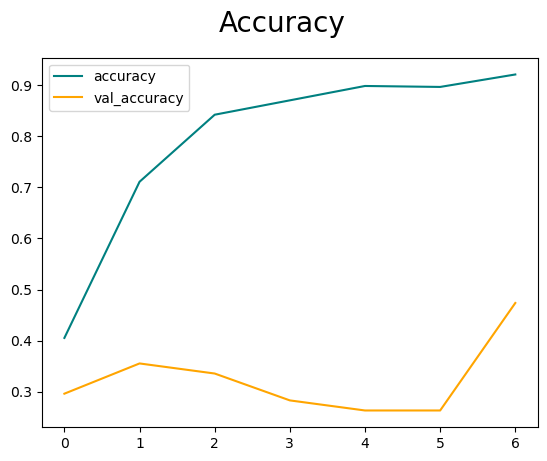

In [110]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color= 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()